In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
np.random.seed(5)

## 線性迴歸

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


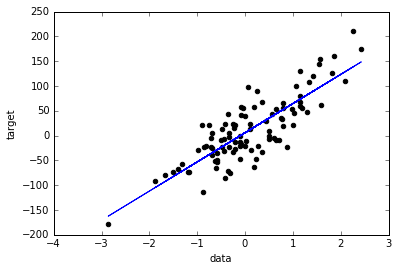

Coefficients: [ 58.80474649]
Intercept: 5.72845498016
Mean squared error: 1365.53
Variance score: 0.69


In [2]:
from sklearn import linear_model as lm

# generate training data from sin function
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=35)

# training linear regression 
regr = lm.LinearRegression()
regr.fit(X, y)

# draw result
plt.scatter(X, y,  color='black')
plt.plot(X, regr.predict(X), color='blue')
plt.xlabel('data')
plt.ylabel('target')
plt.show()

print('Coefficients: %s' % str(regr.coef_))
print('Intercept: %s'% str(regr.intercept_))
print("Mean squared error: %.2f" % np.mean((regr.predict(X) - y) ** 2))
print('Variance score: %.2f' % regr.score(X, y))

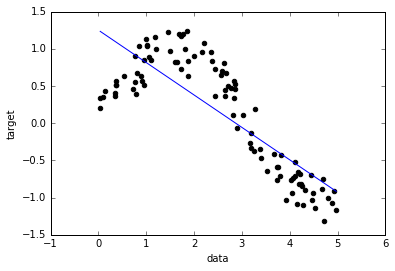

In [3]:
# generate training data from sin function
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y += np.random.randint(low=-100, high=100, size=100) / 300.0

# training linear regression 
regr = lm.LinearRegression()
regr.fit(X, y)

# draw result
plt.scatter(X, y,  color='black')
plt.plot(X, regr.predict(X), color='blue')
plt.xlabel('data')
plt.ylabel('target')
plt.show()

## 線性迴歸考慮空間轉換

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline

# generate training data from sin function
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y += np.random.randint(low=-100, high=100, size=100) / 300.0

errs = np.zeros((5, 4))
for n_train_fold in xrange(1, 5):
    for n_degree in xrange(1, 6):
        # training linear regression with polynomial transform
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=n_degree)),
            ('lm', lm.LinearRegression())
        ])
        model.fit(X[:25*n_train_fold + 25,], y[:25*n_train_fold + 25])
        errs[n_degree-1][n_train_fold-1] = np.mean((model.predict(X) - y) ** 2)
print errs

[[  2.45754666e+00   2.88753708e-01   2.01843556e-01   2.01843556e-01]
 [  1.41382464e+00   5.65884515e-01   9.06166015e-02   9.06166015e-02]
 [  1.33973036e+01   1.74731981e-01   4.10931086e-02   4.10931086e-02]
 [  9.45864632e+00   8.48937617e-02   3.94727211e-02   3.94727211e-02]
 [  2.46409014e+04   6.86134487e-01   3.79934320e-02   3.79934320e-02]]


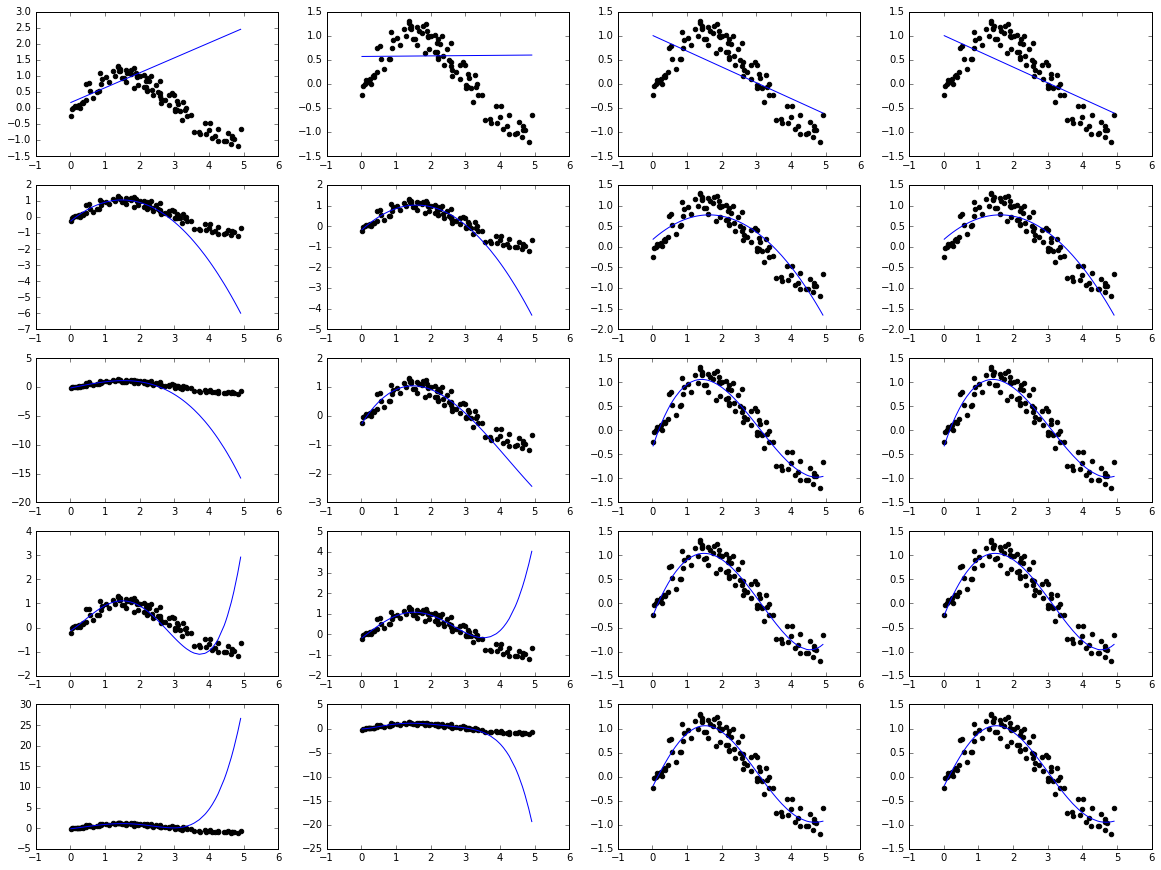

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline

# generate training data from sin function
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y += np.random.randint(low=-100, high=100, size=100) / 300.0

fig, axarr = plt.subplots(5, 4, figsize=(20, 15))
for n_train_fold in xrange(1, 5):
    for n_degree in xrange(1, 6):
        # training linear regression with polynomial transform
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=n_degree)),
            ('lm', lm.LinearRegression())
        ])
        model.fit(X[:25*n_train_fold + 25,], y[:25*n_train_fold + 25])
        # draw result
        axarr[n_degree-1][n_train_fold-1].scatter(X, y,  color='black')
        axarr[n_degree-1][n_train_fold-1].plot(X, model.predict(X), color='blue')
plt.show()

## 防止overfitting

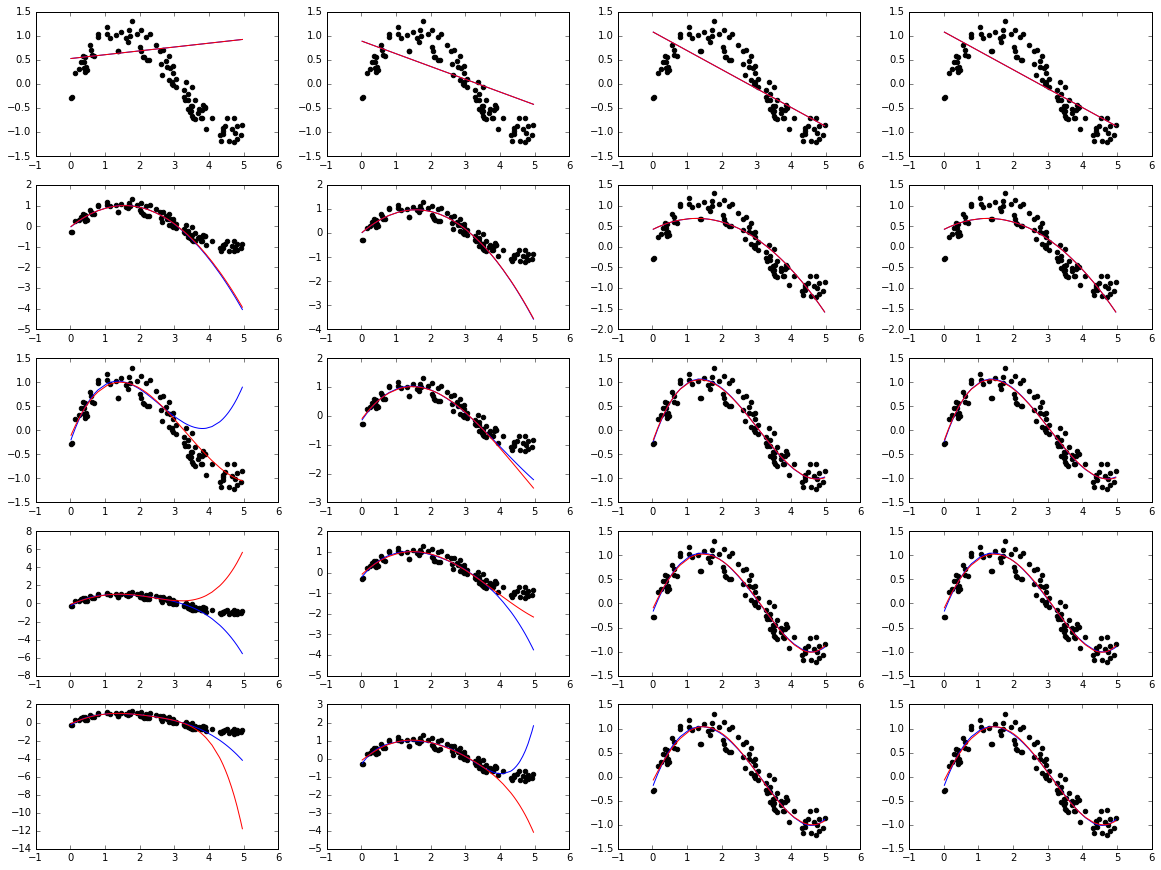

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline

# generate training data from sin function
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y += np.random.randint(low=-100, high=100, size=100) / 300.0

fig, axarr = plt.subplots(5, 4, figsize=(20, 15))
for n_train_fold in xrange(1, 5):
    for n_degree in xrange(1, 6):
        # training linear regression with polynomial transform
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=n_degree)),
            ('lm', lm.LinearRegression())
        ])
        model.fit(X[:25*n_train_fold + 25,], y[:25*n_train_fold + 25])
        # training ridge regression with polynomial transform
        model2 = Pipeline([
            ('poly', PolynomialFeatures(degree=n_degree)),
            ('lm', lm.Ridge(alpha=0.05))
        ])
        model2.fit(X[:25*n_train_fold + 25,], y[:25*n_train_fold + 25])
        # draw result
        axarr[n_degree-1][n_train_fold-1].scatter(X, y,  color='black')
        axarr[n_degree-1][n_train_fold-1].plot(X, model.predict(X), color='blue')
        axarr[n_degree-1][n_train_fold-1].plot(X, model2.predict(X), color='red')
plt.show()

## 玩玩看其他的資料吧！

In [7]:
from lib import CVECrawler
cve_items = CVECrawler.CVECrawler.download('2017')
print cve_items[0]

number of downloaded CVE : 3905
refresh date :  Sun Jun 18 03:01:14 EDT 2017
['CVE-2017-0001' '7.8'
 'The Graphics Device Interface (GDI) in Microsoft Windows Vista SP2; Windows Server 2008 SP2 and R2 SP1; Windows 7 SP1; Windows 8.1; Windows Server 2012 Gold and R2; Windows RT 8.1; and Windows 10 Gold, 1511, and 1607 allows local users to gain privileges via a crafted application, aka "Windows GDI Elevation of Privilege Vulnerability." This vulnerability is different from those described in CVE-2017-0005, CVE-2017-0025, and CVE-2017-0047.']


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

tfidf = CountVectorizer(stop_words='english', min_df=5)
X = tfidf.fit_transform(cve_items[:,2]).toarray()
y = cve_items[:,1].astype(float)
print X.shape

(3552, 1829)


In [9]:
from sklearn import linear_model as lm
from IPython.display import display

regr = lm.LinearRegression()
regr.fit(X[:2500,], y[:2500])

print("Mean squared error: %.2f" % np.mean((regr.predict(X) - y) ** 2))
cve_id = cve_items[2501:2510, 0]
desc = cve_items[2501:2510, 2]
pred_y = regr.predict(X[2501:2510,]).ravel()
real_y = cve_items[2501:2510, 1]
df = pd.DataFrame({
    'id': cve_id,
    'description': desc, 
    'predict score': pred_y, 
    'real score': real_y
})
display(df)

Mean squared error: 29.37


,description,id,predict score,real score
0,Heap-based buffer overflow in the PoDoFo::PdfV...,CVE-2017-6843,7.648184,7.8
1,Buffer overflow in the PoDoFo::PdfParser::Read...,CVE-2017-6844,7.435668,7.8
2,The PoDoFo::PdfColor::operator function in Pdf...,CVE-2017-6845,5.227122,5.5
3,The GraphicsStack::TGraphicsStackElement::SetN...,CVE-2017-6846,5.640211,5.5
4,The PoDoFo::PdfVariant::DelayedLoad function i...,CVE-2017-6847,5.439926,5.5
5,The PoDoFo::PdfXObject::PdfXObject function in...,CVE-2017-6848,5.227122,5.5
6,The PoDoFo::PdfColorGray::~PdfColorGray functi...,CVE-2017-6849,5.227122,5.5
7,The jp2_cdef_destroy function in jp2_cod.c in ...,CVE-2017-6850,5.065722,5.5
8,The jas_matrix_bindsub function in jas_seq.c i...,CVE-2017-6851,5.942264,5.5


In [10]:
from sklearn import linear_model as lm
from IPython.display import display

regr = lm.Lasso(alpha=0.01)
regr.fit(X[:2500,], y[:2500])
print("Mean squared error: %.2f" % np.mean((regr.predict(X) - y) ** 2))

cve_id = cve_items[2501:2510, 0]
desc = cve_items[2501:2510, 2]
pred_y = regr.predict(X[2501:2510,]).ravel()
real_y = cve_items[2501:2510, 1]
df = pd.DataFrame({
    'id': cve_id,
    'description': desc, 
    'predict score': pred_y, 
    'real score': real_y
})
display(df)

regr = lm.Lasso(alpha=0.01)
regr.fit(X[:1500,], y[:1500])
print("Mean squared error: %.2f" % np.mean((regr.predict(X) - y) ** 2))

cve_id = cve_items[2501:2510, 0]
desc = cve_items[2501:2510, 2]
pred_y = regr.predict(X[2501:2510,]).ravel()
real_y = cve_items[2501:2510, 1]
df = pd.DataFrame({
    'id': cve_id,
    'description': desc, 
    'predict score': pred_y, 
    'real score': real_y
})
display(df)

Mean squared error: 1.36


,description,id,predict score,real score
0,Heap-based buffer overflow in the PoDoFo::PdfV...,CVE-2017-6843,8.099241,7.8
1,Buffer overflow in the PoDoFo::PdfParser::Read...,CVE-2017-6844,8.099241,7.8
2,The PoDoFo::PdfColor::operator function in Pdf...,CVE-2017-6845,6.451538,5.5
3,The GraphicsStack::TGraphicsStackElement::SetN...,CVE-2017-6846,6.451538,5.5
4,The PoDoFo::PdfVariant::DelayedLoad function i...,CVE-2017-6847,6.451538,5.5
5,The PoDoFo::PdfXObject::PdfXObject function in...,CVE-2017-6848,6.451538,5.5
6,The PoDoFo::PdfColorGray::~PdfColorGray functi...,CVE-2017-6849,6.451538,5.5
7,The jp2_cdef_destroy function in jp2_cod.c in ...,CVE-2017-6850,6.341215,5.5
8,The jas_matrix_bindsub function in jas_seq.c i...,CVE-2017-6851,6.278124,5.5


Mean squared error: 1.77


,description,id,predict score,real score
0,Heap-based buffer overflow in the PoDoFo::PdfV...,CVE-2017-6843,7.477229,7.8
1,Buffer overflow in the PoDoFo::PdfParser::Read...,CVE-2017-6844,7.477229,7.8
2,The PoDoFo::PdfColor::operator function in Pdf...,CVE-2017-6845,6.393952,5.5
3,The GraphicsStack::TGraphicsStackElement::SetN...,CVE-2017-6846,6.393952,5.5
4,The PoDoFo::PdfVariant::DelayedLoad function i...,CVE-2017-6847,6.393952,5.5
5,The PoDoFo::PdfXObject::PdfXObject function in...,CVE-2017-6848,6.393952,5.5
6,The PoDoFo::PdfColorGray::~PdfColorGray functi...,CVE-2017-6849,6.393952,5.5
7,The jp2_cdef_destroy function in jp2_cod.c in ...,CVE-2017-6850,6.653058,5.5
8,The jas_matrix_bindsub function in jas_seq.c i...,CVE-2017-6851,6.647868,5.5
